## Eval 1 Set 1 Test Zero
### Zeel Mehta 21BAI1533

## Data Set Description

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type
  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
  0: Nothing to note
  1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
  signals non-normal heart beat
  2: Possible or definite left ventricular hypertrophy
  Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

14. AHD/target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Add necessary libararies/ modules

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset and display the first 40 records an Identify the columns ( 1 Mark )

In [82]:
df=pd.read_csv('/Users/zeelmehta/Desktop/FALL INTER 23/ML/testzero/data.csv')

In [83]:
df.head(40)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [84]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
397    False
398    False
399    False
400    False
401    False
Length: 402, dtype: bool

#Check any duplicates are there using duplicated() method. Some duplicates are there. ( Hint : Unnamed: 0 - Column is creating the problem - Drop and Try)     ( 2 Marks)


*   Display number of duplcaites in the dataset



# Check any Null values - Identify the suitable Imputing technique for the feature **'Thal'** and apply the same.  ( 2 Marks )

In [85]:
df['Thal'].isnull().values.sum()

2

In [86]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [87]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df[['Thal']]=imp.fit_transform(df[['Thal']])
df[['Thal']]

,Thal
0,fixed
1,normal
2,reversable
3,normal
4,normal
...,...
397,normal
398,normal
399,normal
400,reversable


In [88]:
df['Thal'].isnull().values.sum()

0

# Visualize the outlier data using Box Plot for the column : chol 1 ( 1 Mark )

In [89]:
import seaborn as sns

*The* below code may be useful for five point Box Plot Summary 

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chol'>

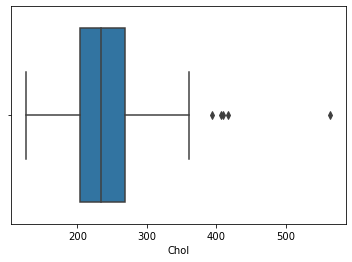

In [90]:
sns.boxplot(df['Chol'])

# Remove the outliers from the data set based on the column : chol ( 2 Marks) and do the box plot again for the same column. You have to use IQR values to do the same.

In [91]:
sorted(df['Chol']) #Return a new list containing all items from the iterable in ascending order.
                      #A custom key function can be supplied to customize the sort order, and the
                      #reverse flag can be set to request the result in descending order.

Q1=df['Chol'].quantile(0.25)
Q3=df['Chol'].quantile(0.75)

#Find IQR 
iqr=Q3-Q1

ub=Q3+(1.5*iqr)
lb=Q1-(1.5*iqr)
print(iqr, ub.round(), lb.round())
# Use the IQR remove the outliers in Chol

65.0 366.0 106.0


In [92]:
u=np.where(df['Chol']>=ub)[0]
l=np.where(df['Chol']<lb)[0]

In [93]:
df.drop(index=u,inplace=True,axis=1)
df.drop(index=l,inplace=True,axis=1)

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chol'>

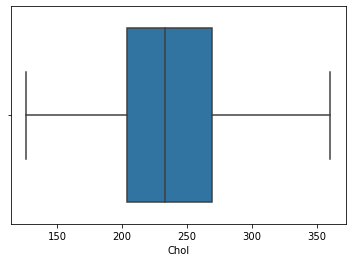

In [94]:
sns.boxplot(df['Chol'])

## Visualize the distribution of 'age' variable ( 2 Marks )

<AxesSubplot:xlabel='Age', ylabel='Count'>

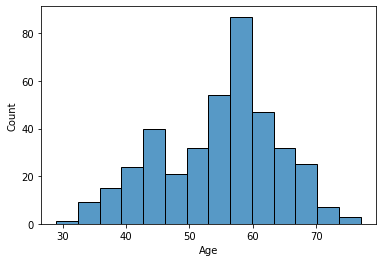

In [95]:
sns.histplot(data=df['Age'])